In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/eunahjung/Documents/BitcoinDataAnalysis/bitcoin_price_Training-Training.csv')

In [3]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [4]:
df.describe().T #transpose

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [5]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [7]:
data = df.sort_index(ascending=False).reset_index()

In [8]:
data.drop('index', axis=1, inplace=True)

In [9]:
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [10]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

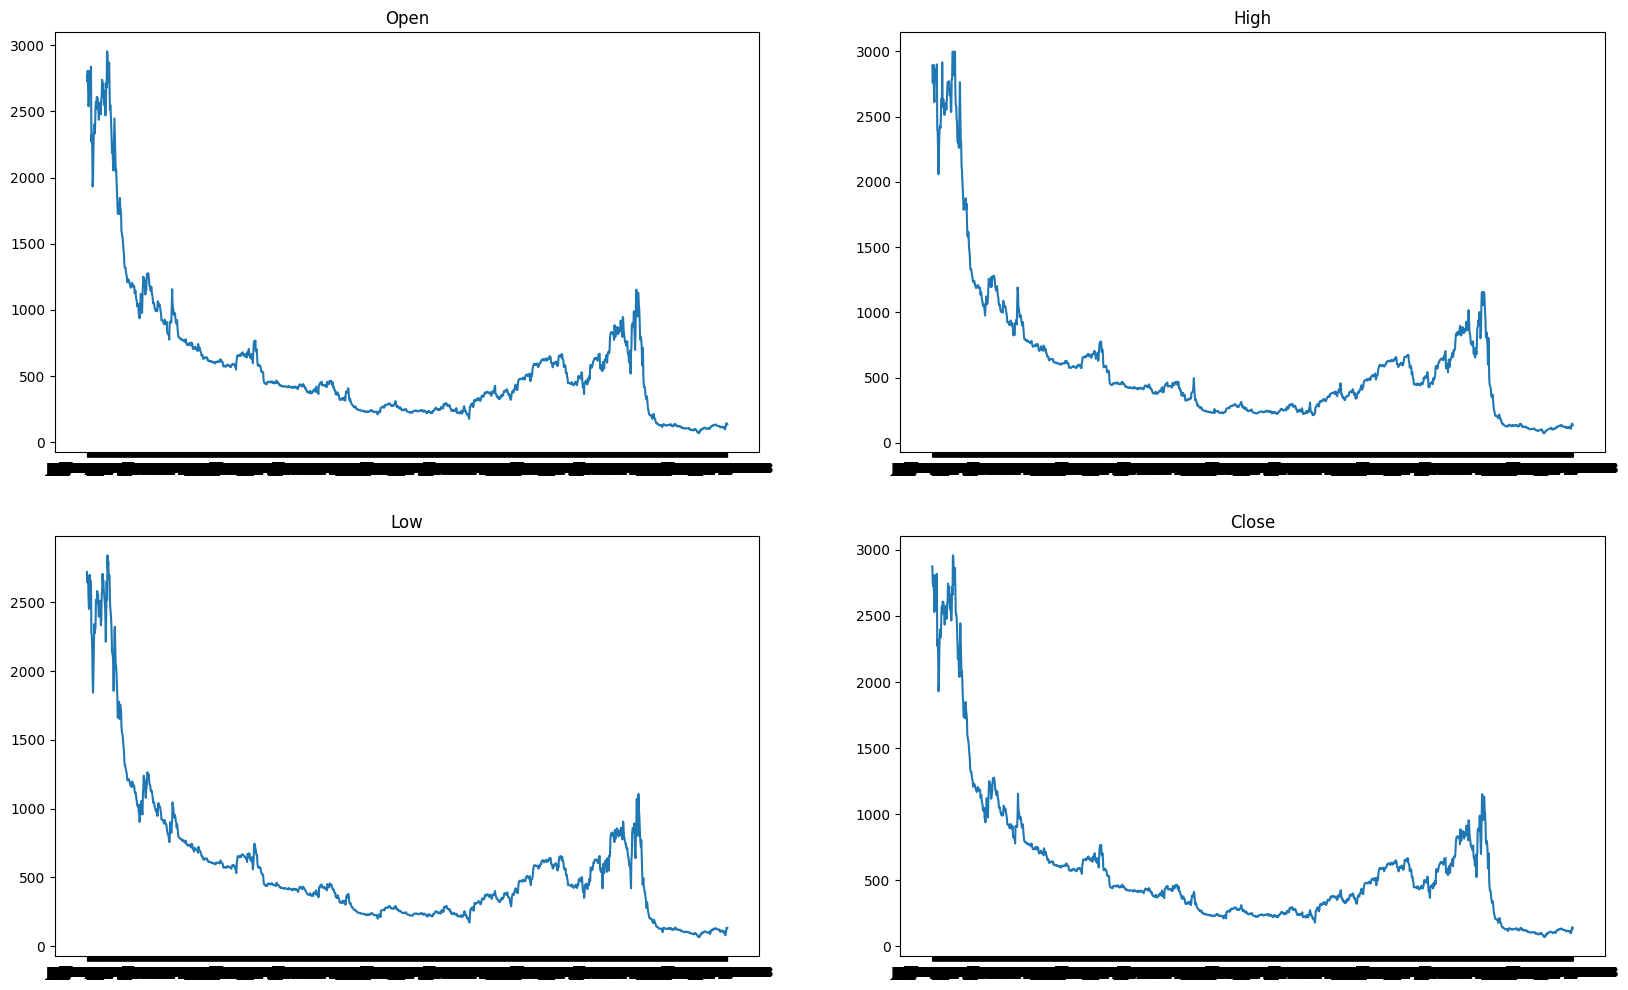

In [11]:
plt.figure(figsize=(20,12))

for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1): 
    plt.subplot(2,2,index)
    plt.plot(df['Date'], df[col])
    plt.title(col)
    

In [12]:
data.shape

(1556, 7)

In [13]:
bitcoin_sample = data[0:50]

In [14]:
import chart_studio.plotly as py 
import plotly.graph_objs as go
# import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [15]:
init_notebook_mode(connected=True)

In [16]:
trace = go.Candlestick(x=bitcoin_sample['Date'], 
              high = bitcoin_sample['High'],
              open = bitcoin_sample['Open'],
              close = bitcoin_sample['Close'], 
              low = bitcoin_sample['Low'])

In [17]:
layout = {
    "title":"Bitcoin Historical Price", 
    'xaxis':{'title':'Date'}
}

In [18]:
candle_data = [trace]

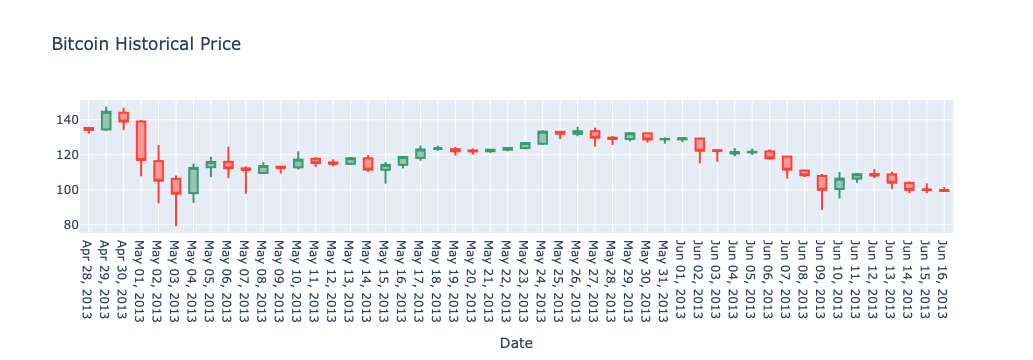

In [19]:
fig = go.Figure(data=candle_data , layout=layout)
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()